In [1]:
import numpy as np
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

import cv2

Using TensorFlow backend.


In [2]:
!pip install tensorboardcolab
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

In [3]:
encoding_dim = 32
 
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
(x_train, _), (x_test, _) = mnist.load_data()
# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))




Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 2s 38us/step - loss: 0.2757 - val_loss: 0.1931
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1725 - val_loss: 0.1542
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1447 - val_loss: 0.1340
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1285 - val_loss: 0.1208
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1177 - val_loss: 0.1122
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1105 - val_loss: 0.1064
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1054 - val_loss: 0.1020
Epoch 8/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1018 - val_loss: 0.0991
Epoch 9/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0994 - val_loss: 0.09

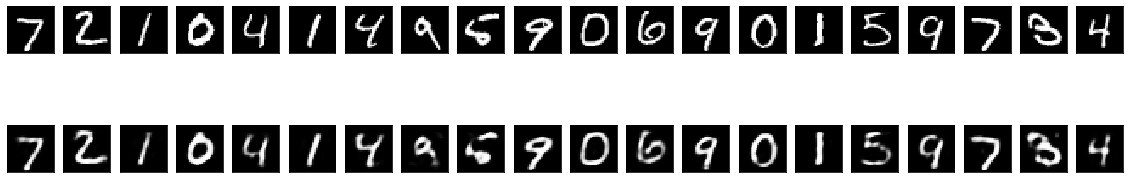

In [5]:
# 20 epochs

# tbc=TensorBoardColab()
# autoencoder.fit(x_train, x_train,
#                 epochs=20,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test),
#                 callbacks=[TensorBoardColabCallback(tbc)])

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20 # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

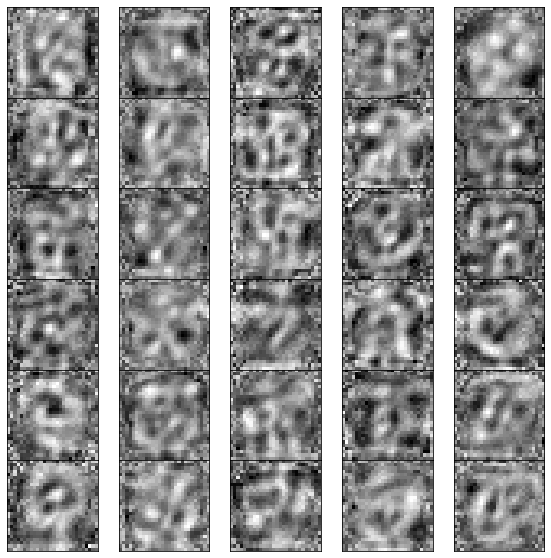

In [6]:
weights = autoencoder.layers[1].get_weights()

theta = np.array(weights[0]).T
norm_theta = np.linalg.norm(theta, axis=0)

theta = theta / norm_theta

plt.figure(figsize=(10,10))
for i in range(30):
    ax = plt.subplot(6, 5, i + 1)
    plt.imshow(theta[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [7]:
print(encoded_imgs.mean())

9.13317


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0935

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.178179). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 2s 26us/step - loss: 0.0935 - val_loss: 0.0923
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0934 - val_loss: 0.0923
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0934 - val_loss: 0.0921
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0933 - val_loss: 0.0920
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0932 - val_loss: 0.0921
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0932 - val_loss: 0.0920
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0932 - val_loss: 0.0919
Epoch 8/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0931 - val_loss: 0.0919
Epoch 9/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0931 - val_loss: 0.0919
Epoch 10/20
60000/60000 [==============================] - 1s 23us

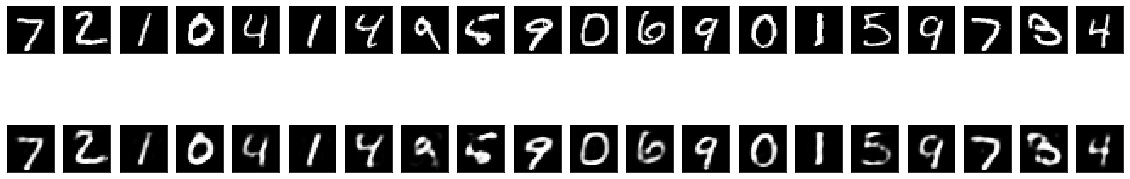

In [8]:
# 40 epochs
# tbc=TensorBoardColab()
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20 # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

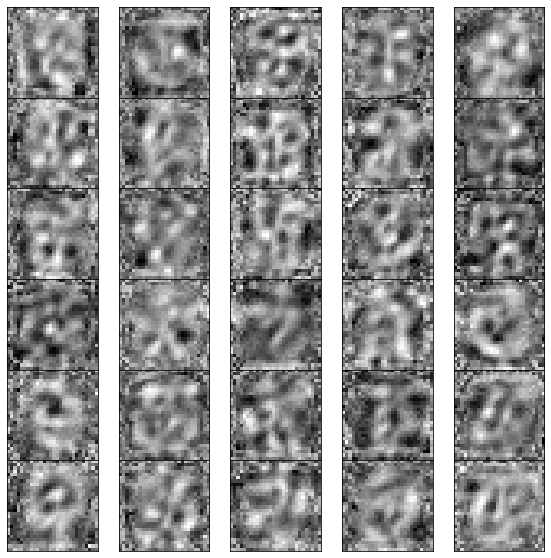

In [9]:
weights = autoencoder.layers[1].get_weights()

theta = np.array(weights[0]).T
norm_theta = np.linalg.norm(theta, axis=0)

theta = theta / norm_theta

plt.figure(figsize=(10,10))
for i in range(30):
    ax = plt.subplot(6, 5, i + 1)
    plt.imshow(theta[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [10]:
print(encoded_imgs.mean())

9.027036


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0928 - val_loss: 0.0917
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0928 - val_loss: 0.0918
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0928 - val_loss: 0.0917
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0928 - val_loss: 0.0916
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0928 - val_loss: 0.0918
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0927 - val_loss: 0.0916
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0927 - val_loss: 0.0916
Epoch 8/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0927 - val_loss: 0.0917
Epoch 9/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0927 - val_loss: 0.0916
Epoch

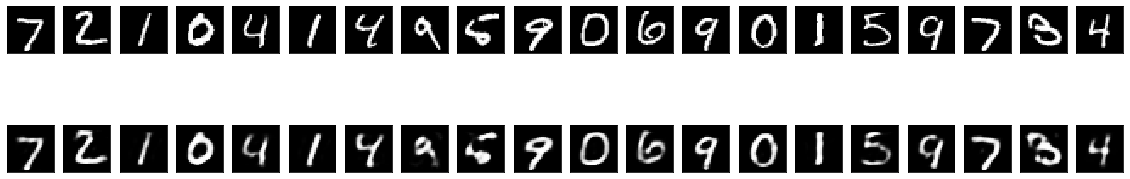

In [11]:
# 60 epochs
# tbc=TensorBoardColab()
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20 # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

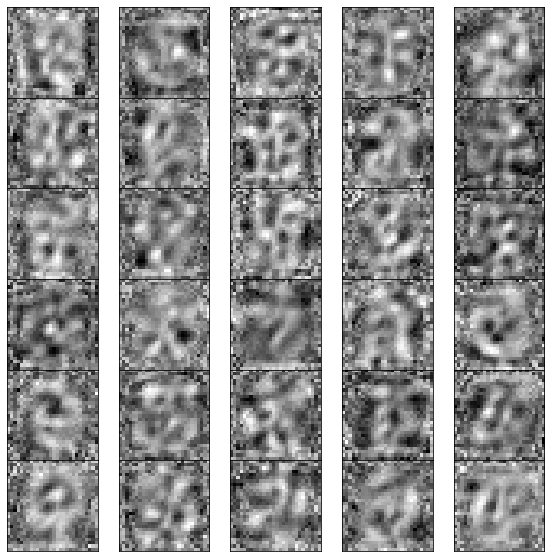

In [12]:
weights = autoencoder.layers[1].get_weights()

theta = np.array(weights[0]).T
norm_theta = np.linalg.norm(theta, axis=0)

theta = theta / norm_theta

plt.figure(figsize=(10,10))
for i in range(30):
    ax = plt.subplot(6, 5, i + 1)
    plt.imshow(theta[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [13]:
print(encoded_imgs.mean())

8.713569


In [0]:
# # 200+ epochs
# # tbc=TensorBoardColab()
# autoencoder.fit(x_train, x_train,
#                 epochs=200,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))

# # encode and decode some digits
# # note that we take them from the *test* set
# encoded_imgs = encoder.predict(x_test)
# decoded_imgs = decoder.predict(encoded_imgs)

# n = 20 # how many digits we will display
# fig = plt.figure(figsize=(20, 4))
# for i in range(n):
#     # display original
#     ax = plt.subplot(2, n, i + 1)
#     plt.imshow(x_test[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # display reconstruction
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.imshow(decoded_imgs[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

In [0]:
# weights = autoencoder.layers[1].get_weights()

# theta = np.array(weights[0]).T
# norm_theta = np.linalg.norm(theta, axis=0)

# theta = theta / norm_theta

# plt.figure(figsize=(10,10))
# for i in range(30):
#     ax = plt.subplot(6, 5, i + 1)
#     plt.imshow(theta[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
#     ax.set_aspect('equal')

# plt.subplots_adjust(hspace=0, wspace=0)
# plt.show()

In [0]:
# print(encoded_imgs.mean())

In [0]:
(_, _), (x_test_noisy, _) = mnist.load_data()
# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
# x_train = x_train.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))

noise = np.random.normal(loc=0, scale=1, size=x_test_noisy.shape)
x_test_noisy = x_test_noisy + noise
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

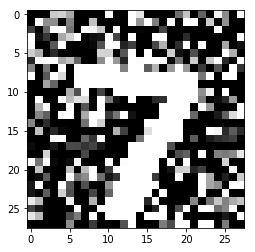

In [18]:
fig = plt.figure()
plt.imshow(x_test_noisy[0].reshape(28, 28))
plt.gray()
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0926 - val_loss: 0.0915
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0926 - val_loss: 0.0915
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0926 - val_loss: 0.0915
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0926 - val_loss: 0.0915
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0926 - val_loss: 0.0915
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0926 - val_loss: 0.0915
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0926 - val_loss: 0.0915
Epoch 8/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0925 - val_loss: 0.0915
Epoch 9/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0925 - val_loss: 0.0915
Epoch

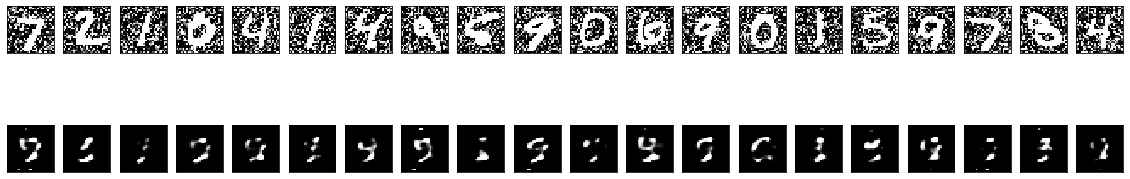

In [19]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

n = 20 # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()